In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
mydir = "counts-VJC-R2/"
os.listdir(mydir)

['count-igl.txt',
 'count-IGH-VJC.txt',
 'count-sequences.txt',
 'count-alignments.txt',
 'count-tra.txt',
 'count-IGL-VJC.txt',
 'count-TRB-VJC.txt',
 'count-ufis.txt',
 'count-IGK-VJC.txt',
 'count-trb.txt',
 'count-igk.txt',
 'count-TRA-VJC.txt',
 'count-igh.txt',
 'count-assembly.txt']

In [3]:
df_totalseq = pd.read_csv(mydir + 'count-sequences.txt', sep=" ", header=None)
df_totalseq.columns = ['barcode', 'totalseq']
df_totalseq.head()

,barcode,totalseq
0,AACTCTGG,678540
1,AAGACAGC,1051166
2,AAGCACAT,12065
3,AAGCGAGT,2876236
4,AAGCTGCA,1681712


In [4]:
df_ufis = pd.read_csv(mydir + 'count-ufis.txt', sep=" ", header=None)
df_ufis.columns = ['barcode', 'ufis']
df_ufis.head()

,barcode,ufis
0,AAACAGGC,174
1,AAAGCGGA,530
2,AAAGGCTG,392
3,AACACGCA,26
4,AACATGGG,352


# link tables and make scatterplot

In [5]:
df = pd.merge(df_totalseq, df_ufis, how='left', on='barcode')
df = df.fillna(0)
df.head()

,barcode,totalseq,ufis
0,AACTCTGG,678540,308
1,AAGACAGC,1051166,570
2,AAGCACAT,12065,12
3,AAGCGAGT,2876236,3934
4,AAGCTGCA,1681712,763


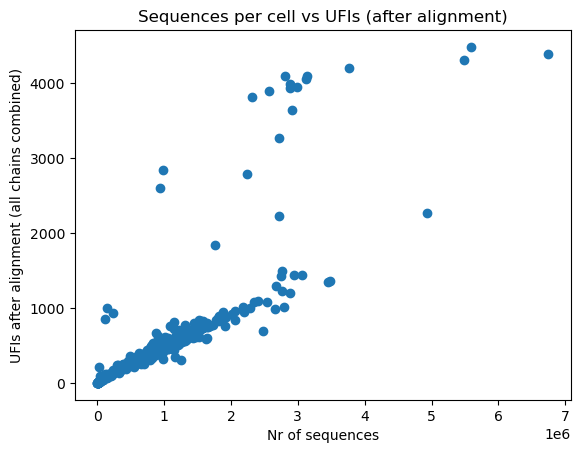

In [6]:
plt.scatter(df['totalseq'], df['ufis'])
plt.title("Sequences per cell vs UFIs (after alignment)")
plt.xlabel("Nr of sequences")
plt.ylabel("UFIs after alignment (all chains combined)")
plt.show()

# Plot the same information per chain

In [7]:
cdr3dir = "cdr3-VJC/"
myfiles = os.listdir(cdr3dir)
myfiles[:10]

['CCGCATTT_S1.assembled.fastq.gz-IGL_HUMAN-CDR3.csv',
 'CACACTGA_S1.assembled.fastq.gz-IGL_HUMAN-CDR3.csv',
 'TCGCCATT_S1.assembled.fastq.gz-IGH_HUMAN-CDR3.csv',
 'CCATTTCC_S1.assembled.fastq.gz-TRB_HUMAN-CDR3.csv',
 'TCTAGAGG_S1.assembled.fastq.gz-TRA_HUMAN-CDR3.csv',
 'TACCACGA_S1.assembled.fastq.gz-IGL_HUMAN-CDR3.csv',
 'TTACGGGT_S1.assembled.fastq.gz-IGL_HUMAN-CDR3.csv',
 'CAGTGTCA_S1.assembled.fastq.gz-TRB_HUMAN-CDR3.csv',
 'CGTGATTC_S1.assembled.fastq.gz-IGK_HUMAN-CDR3.csv',
 'TCAGCACT_S1.assembled.fastq.gz-IGH_HUMAN-CDR3.csv']

In [8]:
def readCdr3(f):
    c = f.split("_")
    barcode = c[0]
    chain = c[1].split("-")[-1]
    df = pd.read_csv(cdr3dir + f, header=None, sep="\t")
    df = df.rename(columns={0: 'acc', 4: 'cdr3'})
    df['barcode'] = barcode
    df['chain'] = chain
    cols = ['barcode', 'chain', 'acc', 'cdr3']
    df = df[cols]
    return(df)

In [9]:
if os.path.getsize(cdr3dir + myfiles[0]) > 0:
    df_cdr3 = readCdr3(myfiles[0])
for f in myfiles[1:]:
    if os.path.getsize(cdr3dir + f) > 0:
        df_cdr3 = pd.concat([df_cdr3, readCdr3(f)])

In [10]:
df_cdr3.head()

,barcode,chain,acc,cdr3
0,CCGCATTT,IGL,ST-E00127:1241:HHKC7CCX2:5:1201:10196:3823,CQVWDSS
0,TACCACGA,IGL,ST-E00127:1241:HHKC7CCX2:5:1108:2960:15689,CQVWDSS
1,TACCACGA,IGL,ST-E00127:1241:HHKC7CCX2:5:1205:17716:56792,CQAWD
0,TCAGCACT,IGH,ST-E00127:1241:HHKC7CCX2:5:1101:20354:3594,CPRQGVCASQGLRVVPAAMDYYYCGLDVG
1,TCAGCACT,IGH,ST-E00127:1241:HHKC7CCX2:5:1101:14641:10292,CARQGVGARQGVGVVPAAMDYYYSGLDVW


In [11]:
ufidir = "ufis-VJC/"
myfiles = os.listdir(ufidir)
myfiles[:10]

['ATACACGG_S1_L001_R1_001-mapped-ufis.csv',
 'ACCACGAT_S1_L001_R1_001-mapped-ufis.csv',
 'GCATTTGG_S1_L001_R1_001-mapped-ufis.csv',
 'ACATGTGC_S1_L001_R1_001-mapped-ufis.csv',
 'GGGATTGT_S1_L001_R1_001-mapped-ufis.csv',
 'CGGTAATC_S1_L001_R1_001-mapped-ufis.csv',
 'TCGCGATA_S1_L001_R1_001-mapped-ufis.csv',
 'AAGTCTCG_S1_L001_R1_001-mapped-ufis.csv',
 'CCTTCAAG_S1_L001_R1_001-mapped-ufis.csv',
 'ATAGCTGC_S1_L001_R1_001-mapped-ufis.csv']

In [12]:
def readUfi(f):
    barcode = f.split("_")[0]
    df = pd.read_csv(ufidir + f, header=None, sep="\t")
    df = df.rename(columns={0: 'acc', 1: 'ufi'})
    df['barcode'] = barcode
    return(df)

In [13]:
if os.path.getsize(ufidir + myfiles[0]) > 0:
    df_ufis = readUfi(myfiles[0])
for f in myfiles[1:]:
    if os.path.getsize(ufidir + f) > 0:
        df_ufis = pd.concat([df_ufis, readUfi(f)])

In [14]:
df_ufis.head()

,acc,ufi,barcode
0,ST-E00127:1241:HHKC7CCX2:5:1101:31812:11804,GGTAAG,ATACACGG
1,ST-E00127:1241:HHKC7CCX2:5:1101:13707:20313,TTCGGG,ATACACGG
2,ST-E00127:1241:HHKC7CCX2:5:1101:28595:24690,TGTATA,ATACACGG
3,ST-E00127:1241:HHKC7CCX2:5:1101:22516:25833,TTGATC,ATACACGG
4,ST-E00127:1241:HHKC7CCX2:5:1101:29508:31547,TTTTGC,ATACACGG


In [15]:
# Link cdr3s to ufis
df_ufi_cdr3 = pd.merge(df_ufis, df_cdr3, how='left', on='acc')
df_ufi_cdr3 = df_ufi_cdr3.fillna(0)
df_ufi_cdr3 = df_ufi_cdr3.rename(columns={'barcode_x': 'barcode'})
cols = ['barcode', 'chain', 'acc', 'ufi', 'cdr3']
df_ufi_cdr3 = df_ufi_cdr3[cols]
df_ufi_cdr3.head()

,barcode,chain,acc,ufi,cdr3
0,ATACACGG,0,ST-E00127:1241:HHKC7CCX2:5:1101:31812:11804,GGTAAG,0
1,ATACACGG,0,ST-E00127:1241:HHKC7CCX2:5:1101:13707:20313,TTCGGG,0
2,ATACACGG,0,ST-E00127:1241:HHKC7CCX2:5:1101:28595:24690,TGTATA,0
3,ATACACGG,0,ST-E00127:1241:HHKC7CCX2:5:1101:22516:25833,TTGATC,0
4,ATACACGG,0,ST-E00127:1241:HHKC7CCX2:5:1101:29508:31547,TTTTGC,0


In [16]:
df_summary = df_ufi_cdr3.groupby(['barcode', 'chain']).agg({'acc': 'nunique', 'ufi': 'nunique', 'cdr3': 'nunique'})
df_summary = df_summary.reset_index()
df_summary = df_summary.rename(columns={'acc': 'reads_ufi', 'ufi': 'unique_ufis', 'cdr3': 'unique_cdr3s'})
df_summary.head()

,barcode,chain,reads_ufi,unique_ufis,unique_cdr3s
0,AAACAGGC,0,514,172,1
1,AAACAGGC,IGH,6,2,1
2,AAACAGGC,IGL,6,2,2
3,AAAGCGGA,0,914,530,1
4,AAAGCGGA,TRA,3,2,1


In [17]:
# check how many ufis there are for AAGCGAGT, should be 3934 in total
df_summary[df_summary['barcode'] == "AAGCGAGT"]

,barcode,chain,reads_ufi,unique_ufis,unique_cdr3s
41,AAGCGAGT,0,111878,3931,1
42,AAGCGAGT,IGH,1335,263,73
43,AAGCGAGT,IGK,7,4,4
44,AAGCGAGT,IGL,746,135,25
45,AAGCGAGT,TRA,3,3,2


In [18]:
# check how many ufis there are for AAGACAGC, should be 570 in total
df_summary[df_summary['barcode'] == "AAGACAGC"]

,barcode,chain,reads_ufi,unique_ufis,unique_cdr3s
34,AAGACAGC,0,1668,568,1
35,AAGACAGC,IGK,2,2,1
36,AAGACAGC,IGL,1,1,1
37,AAGACAGC,TRA,2,2,1


In [19]:
# check how many ufis there are for AACTCTGG, should be 308 in total
df_summary[df_summary['barcode'] == "AACTCTGG"]

,barcode,chain,reads_ufi,unique_ufis,unique_cdr3s
32,AACTCTGG,0,436,306,1
33,AACTCTGG,IGL,2,2,2


NOTE: some reads were identified as both IG-light and TRA

## Make the figures

Description of the columns:

* barcode = cell barcode
* totalseq = total number of sequences per cell
* ufis = number of unique ufis after alignment against VJC
* chain = IGH, IGK, IGL, TRB, TRA or 0 (0 means that no CDR3 was found)
* reads_ufi = number of reads corresponding to the UFIs
* unique_ufis = number of UFIs for that particular chain
* unique_cdr3s = unique number of CDR3 sequences found for that chain (ideally this should be 1)

In [20]:
df = pd.merge(df, df_summary, how='left', on='barcode')
df.head()

,barcode,totalseq,ufis,chain,reads_ufi,unique_ufis,unique_cdr3s
0,AACTCTGG,678540,308,0,436,306,1
1,AACTCTGG,678540,308,IGL,2,2,2
2,AAGACAGC,1051166,570,0,1668,568,1
3,AAGACAGC,1051166,570,IGK,2,2,1
4,AAGACAGC,1051166,570,IGL,1,1,1


In [21]:
df.to_excel("TotalSeqVsUfis.xlsx")
print("Wrote TotalSeqVsUfis.xlsx to disk")

Wrote TotalSeqVsUfis.xlsx to disk


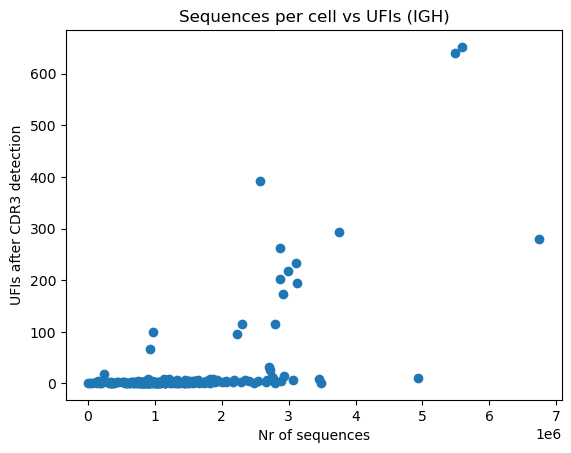

In [22]:
df_igh = df[df['chain'] == "IGH"]
plt.scatter(df_igh['totalseq'], df_igh['unique_ufis'])
plt.title("Sequences per cell vs UFIs (IGH)")
plt.xlabel("Nr of sequences")
plt.ylabel("UFIs after CDR3 detection")
plt.show()

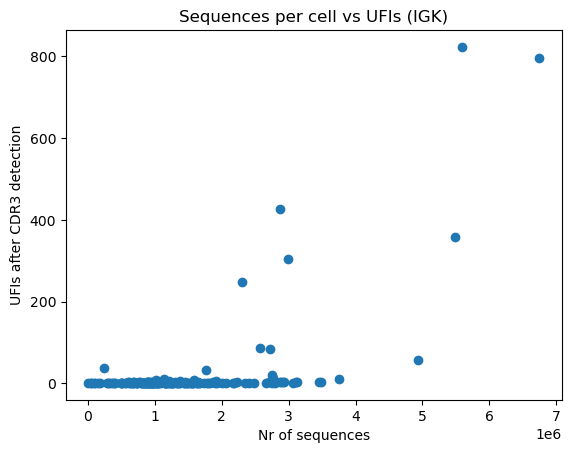

In [23]:
df_igk = df[df['chain'] == "IGK"]
plt.scatter(df_igk['totalseq'], df_igk['unique_ufis'])
plt.title("Sequences per cell vs UFIs (IGK)")
plt.xlabel("Nr of sequences")
plt.ylabel("UFIs after CDR3 detection")
plt.show()

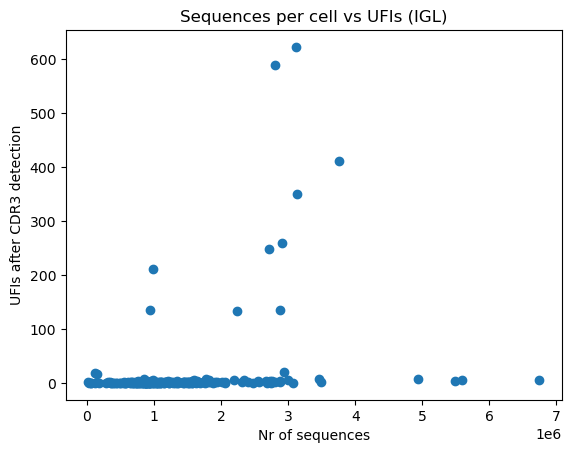

In [24]:
df_igl = df[df['chain'] == "IGL"]
plt.scatter(df_igl['totalseq'], df_igl['unique_ufis'])
plt.title("Sequences per cell vs UFIs (IGL)")
plt.xlabel("Nr of sequences")
plt.ylabel("UFIs after CDR3 detection")
plt.show()

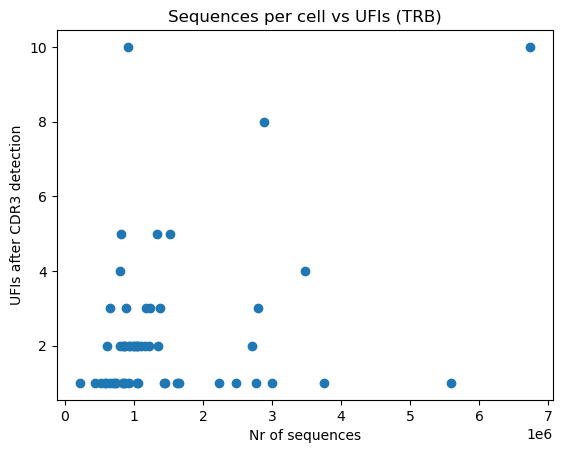

In [25]:
df_trb = df[df['chain'] == "TRB"]
plt.scatter(df_trb['totalseq'], df_trb['unique_ufis'])
plt.title("Sequences per cell vs UFIs (TRB)")
plt.xlabel("Nr of sequences")
plt.ylabel("UFIs after CDR3 detection")
plt.show()

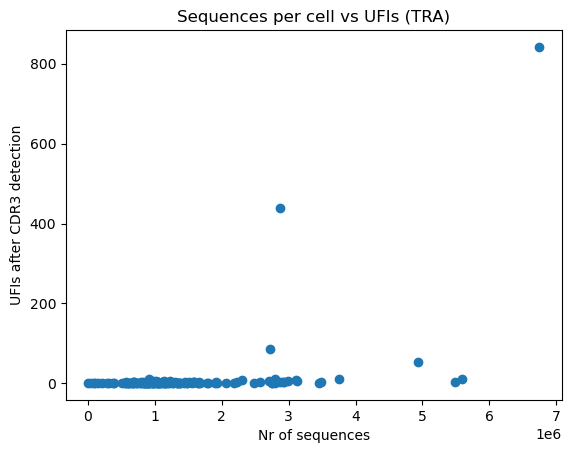

In [26]:
df_tra = df[df['chain'] == "TRA"]
plt.scatter(df_tra['totalseq'], df_tra['unique_ufis'])
plt.title("Sequences per cell vs UFIs (TRA)")
plt.xlabel("Nr of sequences")
plt.ylabel("UFIs after CDR3 detection")
plt.show()

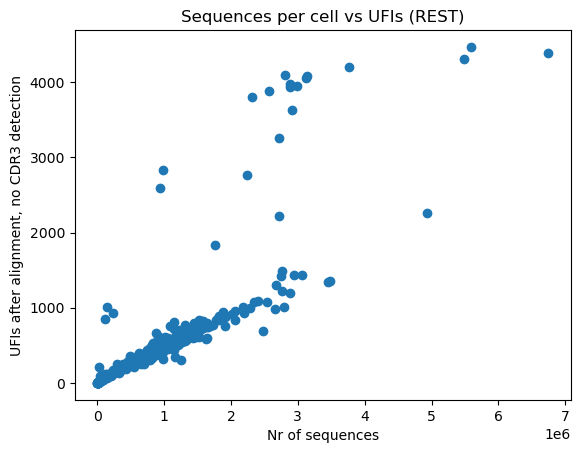

In [27]:
df_rest = df[df['chain'] == 0]
plt.scatter(df_rest['totalseq'], df_rest['unique_ufis'])
plt.title("Sequences per cell vs UFIs (REST)")
plt.xlabel("Nr of sequences")
plt.ylabel("UFIs after alignment, no CDR3 detection")
plt.show()